In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path # Finding CSV file path
%pip install seaborn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('./'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 1. Frame the problem
Using the customer description, define the problem your trying to solve in your own words (remember this is not technical but must be specific so the customer understands the project.

This project will use sales data given by a client in order to predict whether a client would or would not buy a product. Possible attributes that could be used include gender age and estimated salary. The aim is to use a machine learning model to make predictions that would ultimately provide insight on the stores sales and a possible reason for their drop. The performance measure will be F1 score.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

Data was provided by the customer

In [2]:
sales = pd.read_csv(Path("data/RishithaM.csv"))

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          10001 non-null  int64 
 1   name             10001 non-null  object
 2   Gender           10001 non-null  object
 3   Age              10001 non-null  int64 
 4   EstimatedSalary  10001 non-null  int64 
 5   Purchased        10001 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


None of these values are null so I won't have to worry about that.

In [4]:
# Checking values just to see if something is weird
sales["User ID"].value_counts()

User ID
10000    1
16671    1
16664    1
16665    1
16666    1
        ..
13334    1
13335    1
13336    1
13337    1
20000    1
Name: count, Length: 10001, dtype: int64

In [5]:
sales["name"].value_counts()

name
Jennifer Davis         6
Christopher Johnson    6
Christopher Smith      5
John Jones             5
Jennifer Smith         5
                      ..
Cheryl Bridges         1
William Long           1
Ashley Pittman         1
Sean Turner            1
Gary Zavala            1
Name: count, Length: 9402, dtype: int64

Since the names are randomly generated, I will be getting rid of those.

In [6]:
sales["Gender"].value_counts()

Gender
Female    5043
Male      4958
Name: count, dtype: int64

In [7]:
sales["Age"].value_counts()

Age
40    282
37    277
45    275
21    274
43    273
27    270
58    268
30    268
23    264
55    264
29    260
57    259
24    258
41    258
35    256
42    256
50    255
54    254
52    252
33    251
38    250
34    250
48    247
25    246
36    245
59    241
28    239
39    239
51    239
31    237
26    237
20    234
44    233
32    232
56    231
47    231
53    227
46    225
22    224
49    220
Name: count, dtype: int64

In [8]:
sales["EstimatedSalary"].value_counts()

EstimatedSalary
131320    3
74586     3
60678     3
55250     3
16902     3
         ..
95446     1
41995     1
102085    1
45672     1
141914    1
Name: count, Length: 9666, dtype: int64

In [9]:
sales["Purchased"].value_counts()

Purchased
 0    4932
 1    4536
-1     533
Name: count, dtype: int64

I will have figure out how to deal with the returned values.

In [10]:
sales.describe()

,User ID,Age,EstimatedSalary,Purchased
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,15000.000000,39.445555,79261.087091,0.400260
std,2887.184355,11.520966,41110.349903,0.588792
min,10000.000000,20.000000,8008.000000,-1.000000
25%,12500.000000,29.000000,43415.000000,0.000000
50%,15000.000000,39.000000,80133.000000,0.000000
75%,17500.000000,49.000000,114466.000000,1.000000
max,20000.000000,59.000000,149975.000000,1.000000


Scaling needed

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

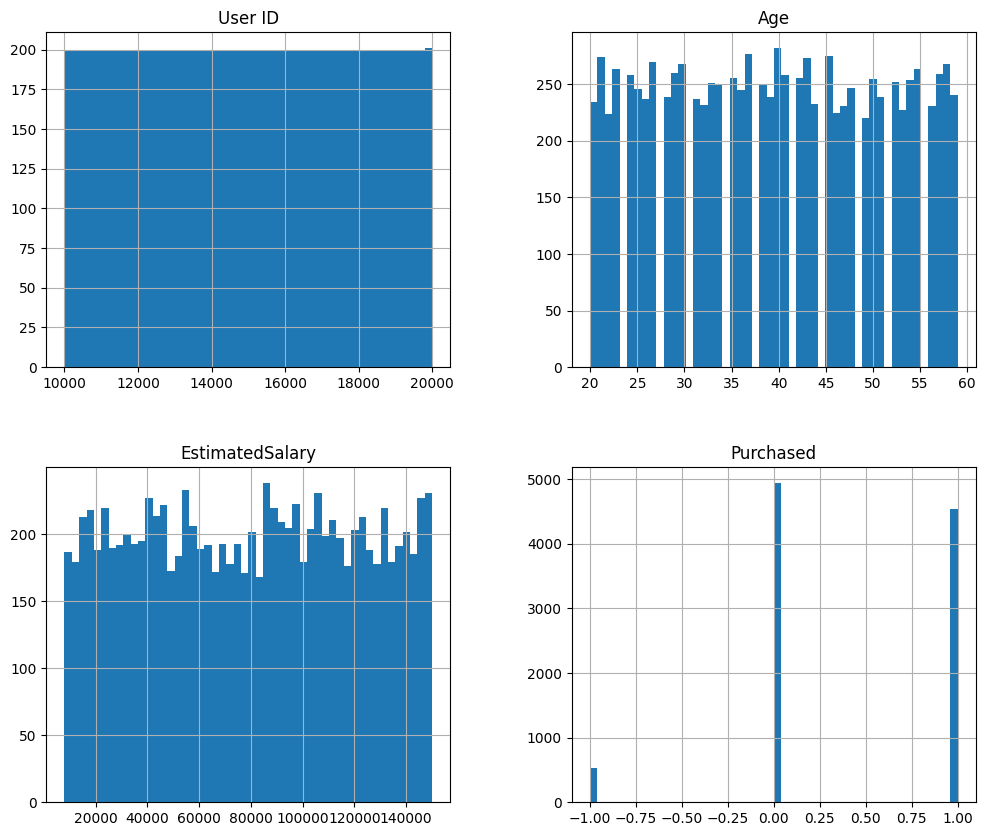

In [11]:
sales.hist(bins = 50, figsize =(12,10))

There are no apparent skews so no transformation will be needed.

In [12]:
sales_female = sales[sales['Gender'] == "Female"]
sales_male = sales[sales['Gender'] == "Male"] 

In [13]:
sales_female.describe()

,User ID,Age,EstimatedSalary,Purchased
count,5043.000000,5043.000000,5043.000000,5043.000000
mean,14948.930399,39.518342,78875.609161,0.394210
std,2884.036665,11.436292,40783.626346,0.595219
min,10000.000000,20.000000,8046.000000,-1.000000
25%,12454.500000,30.000000,43734.000000,0.000000
50%,14884.000000,40.000000,79524.000000,0.000000
75%,17427.000000,49.000000,113002.500000,1.000000
max,19997.000000,59.000000,149972.000000,1.000000


In [14]:
sales_male.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4958.000000,4958.000000,4958.000000,4958.000000
mean,15051.945139,39.371521,79653.173659,0.406414
std,2889.747472,11.607143,41440.467903,0.582177
min,10001.000000,20.000000,8008.000000,-1.000000
25%,12549.250000,29.000000,43082.000000,0.000000
50%,15124.500000,39.000000,80678.000000,0.000000
75%,17560.750000,50.000000,115787.000000,1.000000
max,20000.000000,59.000000,149975.000000,1.000000


array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

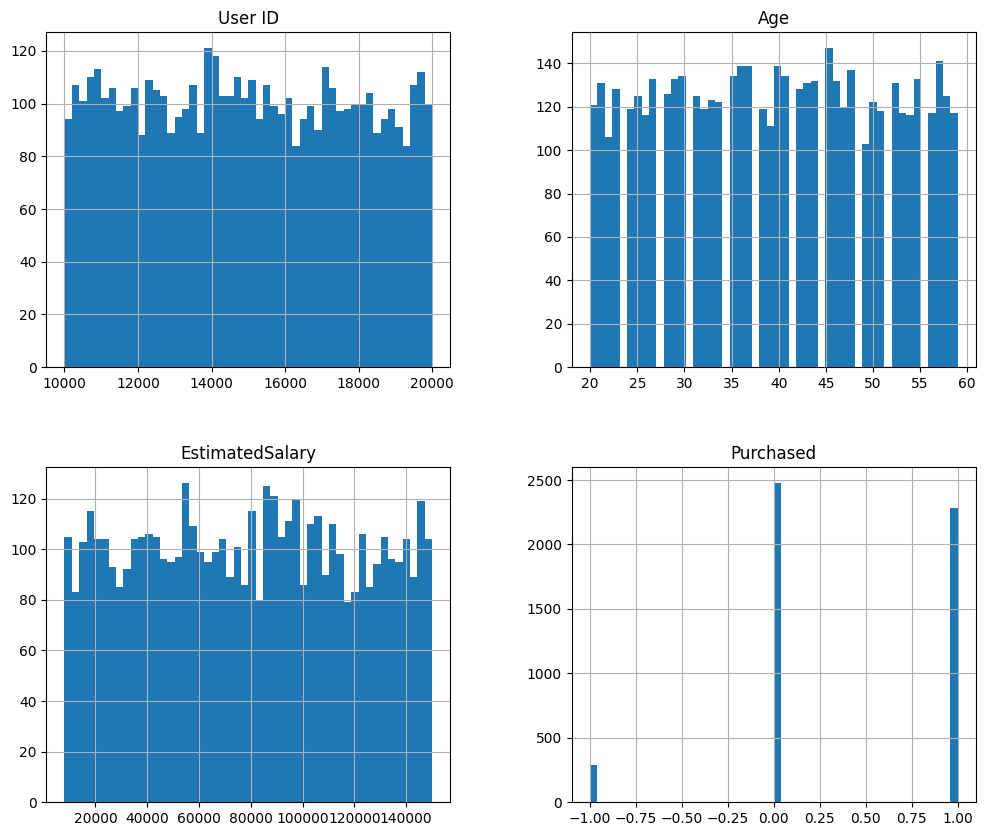

In [15]:
sales_female.hist(bins = 50, figsize =(12,10))

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

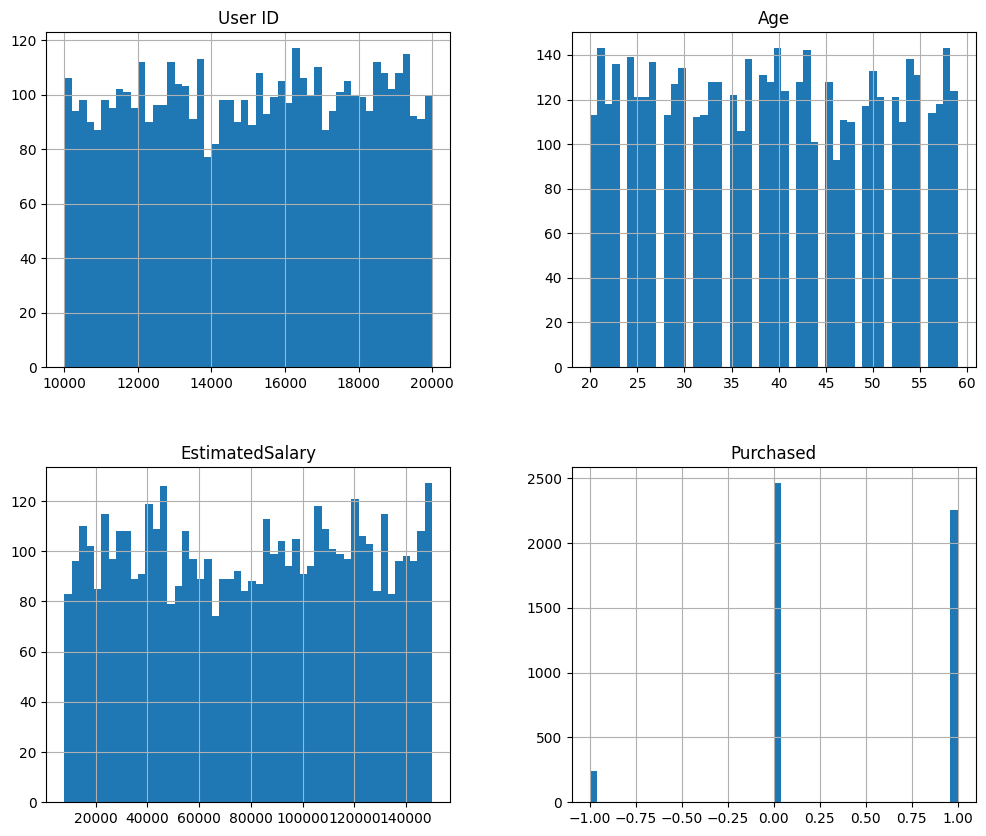

In [16]:
sales_male.hist(bins = 50, figsize =(12,10))

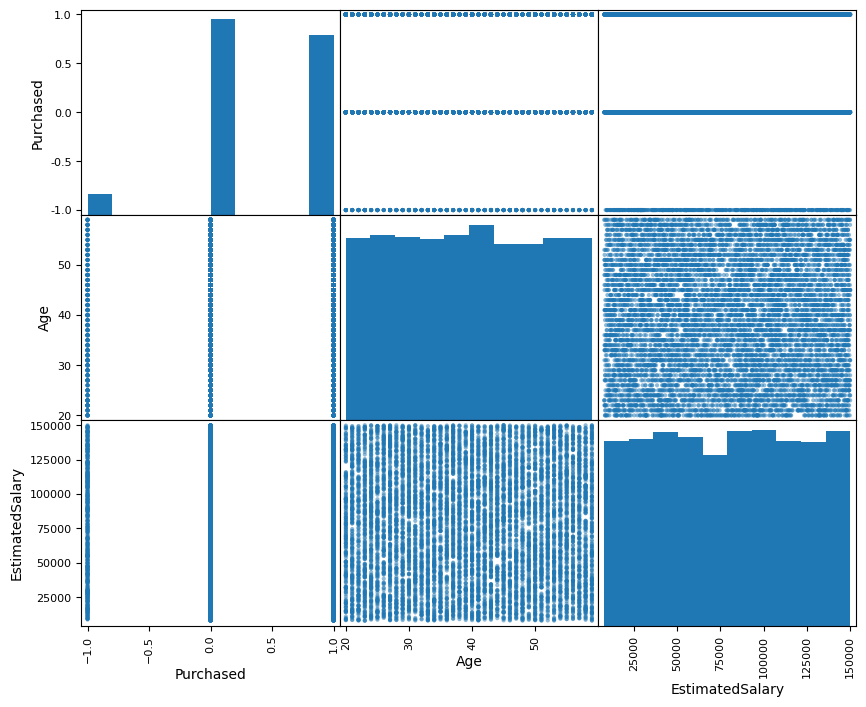

In [17]:
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ['Purchased', 'Age', 'EstimatedSalary']
scatter_matrix(sales[attributes], figsize=(10,8))
plt.show()

In [18]:
corr_matrix = sales.corr(numeric_only=True)
corr_matrix['Purchased'].sort_values(ascending = False)

Purchased          1.000000
Age                0.024950
User ID           -0.007457
EstimatedSalary   -0.008099
Name: Purchased, dtype: float64

Though the User ID correlation is relatively high, using it would case issues so I will drop it.

<Axes: >

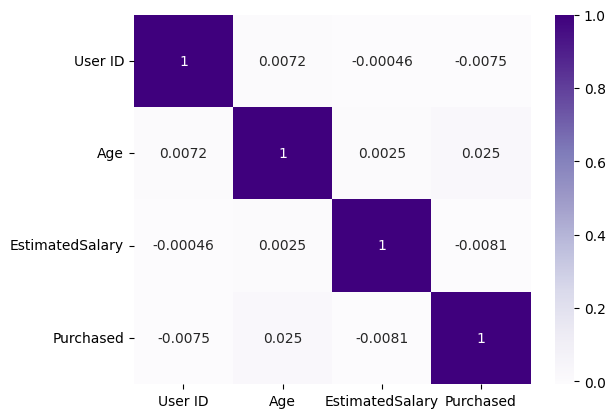

In [19]:
import seaborn as sb

sb.heatmap(corr_matrix, cmap="Purples", annot=True)

In [20]:
corr_matrix_fem = sales_female.corr(numeric_only=True)
corr_matrix_fem['Purchased'].sort_values(ascending = False)

Purchased          1.000000
Age                0.013943
EstimatedSalary   -0.004291
User ID           -0.015541
Name: Purchased, dtype: float64

In [21]:
corr_matrix_men = sales_male.corr(numeric_only=True)
corr_matrix_men['Purchased'].sort_values(ascending = False)

Purchased          1.000000
Age                0.036374
User ID            0.000552
EstimatedSalary   -0.012199
Name: Purchased, dtype: float64

There seems to be no real difference between men and women so I will treat them the same

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


numeric_features = ['Age', 'EstimatedSalary']
categorical_features = ['Gender']

# Use 0 for any null numeric values and scale all of them
numeric_transformer = Pipeline(steps=[('std_scaler', StandardScaler())])
# Ordinally encode the two catgorical features
categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])

# Combine transformers
pipeline_sales = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)

    ])

# Transform the data
transformed = pipeline_sales.fit_transform(sales.drop("Purchased", axis=1)) # I did not end up changing any of these vlues as the final return is not a number but an analysis resented tp the company.
sales_transformed = pd.DataFrame(transformed, columns=[
     'Age', 'EstimatedSalary', 'Gender'])

sales_transformed["Purchased"] = sales["Purchased"].values
sales_transformed.describe()

,Age,EstimatedSalary,Gender,Purchased
count,1.000100e+04,1.000100e+04,10001.000000,10001.000000
mean,-2.522174e-16,-3.197123e-17,0.495750,0.400260
std,1.000050e+00,1.000050e+00,0.500007,0.588792
min,-1.687925e+00,-1.733302e+00,0.000000,-1.000000
25%,-9.067015e-01,-8.719916e-01,0.000000,0.000000
50%,-3.867538e-02,2.121015e-02,0.000000,0.000000
75%,8.293508e-01,8.563944e-01,1.000000,1.000000
max,1.697377e+00,1.720186e+00,1.000000,1.000000


In [23]:
# making sure the orinal encode encoded properly
sales_transformed["Gender"].value_counts()

Gender
0.0    5043
1.0    4958
Name: count, dtype: int64

In [24]:
corr_matrix = sales_transformed.corr(numeric_only=True)
corr_matrix['Purchased'].sort_values(ascending = False)

Purchased          1.000000
Age                0.024950
Gender             0.010364
EstimatedSalary   -0.008099
Name: Purchased, dtype: float64

In [25]:
# gender also has a really low correlation

In [26]:
from sklearn.model_selection import train_test_split
# creating feature variables 
X = sales_transformed.drop('Purchased',axis= 1) 
y = sales_transformed['Purchased']

# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [27]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [28]:
from sklearn.naive_bayes import GaussianNB
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, y_train)

# Make predictions on the test set
GNB_train_pred = GNBmodel.predict(X_train)
GNB_test_pred = GNBmodel.predict(X_test)

# model evaluation 
print('Training Values')
print('mean_squared_error: ', root_mean_squared_error(y_train, GNB_train_pred)) 
print('mean_absolute_error: ', mean_absolute_error(y_train, GNB_train_pred))
print('r2_score: ', r2_score(y_train, GNB_train_pred))
print('accuracy:', accuracy_score(y_train, GNB_train_pred))
print('f1_score:', f1_score(y_train, GNB_train_pred, average='weighted'))
print('\nTesting Values')
print('mean_squared_error test: ', root_mean_squared_error(y_test, GNB_test_pred)) 
print('mean_absolute_error test: ', mean_absolute_error(y_test, GNB_test_pred))
print('r2_score test: ', r2_score(y_test, GNB_test_pred))
print('accuracy:', accuracy_score(y_test, GNB_test_pred))
print('f1_score:', f1_score(y_test, GNB_test_pred, average='weighted'))
print("\nCross Val Scores")
pd.Series(-cross_val_score(GNBmodel, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)).describe()

Training Values
mean_squared_error:  0.7185053931599957
mean_absolute_error:  0.50575
r2_score:  -0.5000133248762366
accuracy: 0.4995
f1_score: 0.39970370358560603

Testing Values
mean_squared_error test:  0.7118613816514117
mean_absolute_error test:  0.5007496251874063
r2_score test:  -0.42203529763014447
accuracy: 0.5022488755622189
f1_score: 0.40575950278288736

Cross Val Scores


count    10.000000
mean      0.724009
std       0.008210
min       0.711512
25%       0.719157
50%       0.722842
75%       0.726937
max       0.741620
dtype: float64

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=20)
KNN_model.fit(X_train, y_train)

# Make predictions on the test set
KNN_train_pred = KNN_model.predict(X_train)
KNN_test_pred = KNN_model.predict(X_test)

# model evaluation 
print('Training Values')
print('mean_squared_error: ', root_mean_squared_error(y_train, KNN_train_pred)) 
print('mean_absolute_error: ', mean_absolute_error(y_train, KNN_train_pred))
print('r2_score: ', r2_score(y_train, KNN_train_pred))
print('accuracy:', accuracy_score(y_train, KNN_train_pred))
print('f1_score:', f1_score(y_train, KNN_train_pred, average='weighted'))
print('\nTesting Values')
print('mean_squared_error test: ', root_mean_squared_error(y_test, KNN_test_pred)) 
print('mean_absolute_error test: ', mean_absolute_error(y_test, KNN_test_pred))
print('r2_score test: ', r2_score(y_test, KNN_test_pred))
print('accuracy:', accuracy_score(y_test, KNN_test_pred))
print('f1_score:', f1_score(y_test, KNN_test_pred, average='weighted'))
print("\nCross Val Scores")
pd.Series(-cross_val_score(KNN_model, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)).describe()

Training Values
mean_squared_error:  0.7006247212309883
mean_absolute_error:  0.453125
r2_score:  -0.4262838563653708
accuracy: 0.56575
f1_score: 0.545175368458457

Testing Values
mean_squared_error test:  0.7564482091019009
mean_absolute_error test:  0.5362318840579711
r2_score test:  -0.6057499169492262
accuracy: 0.4817591204397801
f1_score: 0.4605760193658324

Cross Val Scores


count    10.000000
mean      0.754966
std       0.012949
min       0.736546
25%       0.746240
50%       0.752908
75%       0.765670
max       0.774597
dtype: float64

Both of hhese have very low accuracy and I will be using KNN.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import joblib
param_dist = {
    'n_neighbors': np.arange(1, 5000),  #number of neighbors
    'weights': ['uniform', 'distance'],  #weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  #distance metric
}

In [35]:
# #set up RandomizedSearchCV
# rand_search_thousand = RandomizedSearchCV(KNN_model, param_distributions = param_dist, n_iter = 1000, scoring = 'f1_weighted', cv=3, random_state = 20)

# #fit the RandomizedSearchCV
# rand_search_thousand.fit(X_train, y_train)
# thousand_model = rand_search_thousand.best_estimator_

In [36]:
# # get the best parameters and score
# best_params = rand_search_thousand.best_params_
# best_score =rand_search_thousand.best_score_

In [53]:
import joblib
thousand_model = joblib.load("sales_forcast_thousand.pkl")
y_train_pred_thousand = thousand_model.predict(X_train)
y_test_pred_thousand = thousand_model.predict(X_test)

print("1,000 iterations model:")
# model evaluation 
print('Training Values')
print('mean_squared_error: ', root_mean_squared_error(y_train, y_train_pred_thousand)) 
print('mean_absolute_error: ', mean_absolute_error(y_train, y_train_pred_thousand))
print('r2_score: ', r2_score(y_train, y_train_pred_thousand))
print('accuracy:', accuracy_score(y_train, y_train_pred_thousand))
print('f1_score:', f1_score(y_train, y_train_pred_thousand, average='weighted'))

print('\nTesting Values')
print('mean_squared_error test: ', root_mean_squared_error(y_test, y_test_pred_thousand)) 
print('mean_absolute_error test: ', mean_absolute_error(y_test, y_test_pred_thousand))
print('r2_score test: ', r2_score(y_test, y_test_pred_thousand))
print('accuracy:', accuracy_score(y_test, y_test_pred_thousand))
print('f1_score:', f1_score(y_test, y_test_pred_thousand, average='weighted'))

print("\nCross Val Scores")
pd.Series(-cross_val_score(thousand_model, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 10)).describe()

1,000 iterations model:
Training Values
mean_squared_error:  0.7030291601349122
mean_absolute_error:  0.45475
r2_score:  -0.4360902388766681
accuracy: 0.565
f1_score: 0.5444043154794947

Testing Values
mean_squared_error test:  0.7607303363726605
mean_absolute_error test:  0.5407296351824088
r2_score test:  -0.6239811387137153
accuracy: 0.4782608695652174
f1_score: 0.45732349546555595

Cross Val Scores


count    10.000000
mean      0.756086
std       0.015249
min       0.737394
25%       0.745402
50%       0.754567
75%       0.761167
max       0.782624
dtype: float64

In [47]:
# joblib.dump(thousand_model, "sales_forcast_thousand.pkl")

#print the best parameters, best score, accuracy score, and F1 score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

import joblib
from sklearn.pipeline import make_pipeline

final_model = make_pipeline(pipeline_sales, thousand_model)
joblib.dump(final_model, "sales_forecast_final_model.pkl")

Best Parameters: {'weights': 'uniform', 'n_neighbors': 24, 'metric': 'chebyshev'}
Best Cross-Validation Score: 0.4823


['sales_forecast_final_model.pkl']

My accuracy decreased!

# 7. Present
In a customer facing document provide a summary of findings and detail approach taken.


The first thing I did was assess the goal, which was to find out why a company's sales were decreasing. For this, I decided to predict whether someone would purchase an item, return it, or neither using their age, gender, and estimated salary. I used F1 score as my accuracy measure. The customer provided the data. The names were randomly generated and user ID values are arbitrary, so I dropped those. This left me with the attributes age, gender, and estimated salary. I then encoded the gender values to 0s and 1s and scaled the age and gender so they wouldn't be disproportionately considered.

Then, I tried 2 different models in order to find the best one to move on with. The first thing I tried was a Naive Bayes Gaussian model, which had an F1 score of around .4 for both the rain and test set. I also tried KNN, which performed better at around .54 for the train and .46 for the test. I decided to move on with the KNN model. Lastly, I used a randomized search function, which chooses the given number of possible hyperparameters, or parameters of the parameters, and randomly selects them, outputting the best model. I saved the models given by the 1,000 iteration set and say that the accuracy actually decreased slightly in both the train and the test set. I decided to use it anyway. Lastly, I made a function that takes in the age, estimated salary, and gender and outputs its prediction.

Some possible bias includes what I decided to output as well as the model I chose. 


My conclusions are based off of correlations, the accuracy shown, and the model used. The first thing I notice is that the estimated salary has a relatively high correlation, meaning the object is probably expensive and maybe not a necessity. For the next inference I made a couple of assumptions that are possible areas of bias. My accuracy of prediction at the end was still quite low, at just above half, which is close to what you would get just guessing. Additionally, my model predicted the customers' actions based off of others with similar values. These two facts combined led me to think one possible reason for the sales declining is that the company isn't specific enough with who it is targeting. If the product is in fact expensive and not a necessity, then a general market might not be the way to go rather than targeting a specific group.

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [1]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
def infrence(params):
    df = {'Age': [params[0]],'EstimatedSalary': [params[1]],"Gender": [params[2]]}
    param_df = pd.DataFrame(data=df)
    final_model = joblib.load("sales_forecast_final_model.pkl")
    results = final_model.predict(param_df)[0]
    return results

In [2]:
print(infrence([25,129170,'Female']))

0


/opt/tljh/user/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
